In [23]:
##### Load the csv data into Pandas's DataFrame
import pandas as pd
pima_data = pd.read_csv("C:/Users/frank/Documents/0.UNI/Predeparture-main/assignment2/pima-diabetes.csv", header=None, names=["timepreg","glucose","bp","tricepthickness","insulin","bmi","pedigree","age","diabetes"])
# the names parameter in function above adds column "headers" to data file
# full names of these column "headers" are listed below:
# timepreg = number of times pregnant
# glucose = plasma glucose concentration at 2 hours in an oral glucose tolerance test
# bp = diastolic blood pressure (mm Hg)
# tricepthickness = triceps skin fold thickness (mm)
# insulin = 2-hour serum insulin (mu U/ml)
# bmi = body mass index (weight in kg/(height in m)^2)
# pedigree = diabetes pedigree function
# age = age(years)
# diabetes = whether the individual had diabetes after 5 years

In [25]:
##### Divide the data into 80% for training and 20% for testing
training_data = pima_data.sample(frac=0.8, random_state=42)
test_data = pima_data.drop(training_data.index)
print(training_data)

     timepreg  glucose  bp  tricepthickness  insulin   bmi  pedigree  age  \
668         6       98  58               33      190  34.0     0.430   43   
324         2      112  75               32        0  35.7     0.148   21   
624         2      108  64                0        0  30.8     0.158   21   
690         8      107  80                0        0  24.6     0.856   34   
473         7      136  90                0        0  29.9     0.210   50   
..        ...      ...  ..              ...      ...   ...       ...  ...   
384         1      125  70               24      110  24.3     0.221   25   
224         1      100  66               15       56  23.6     0.666   26   
729         2       92  52                0        0  30.1     0.141   22   
630         7      114  64                0        0  27.4     0.732   34   
472         0      119  66               27        0  38.8     0.259   22   

     diabetes  
668         0  
324         0  
624         0  
690        

In [26]:
##### Prepare the training and test data
training_label = training_data.pop("diabetes")
test_label = test_data.pop("diabetes")

In [27]:
##### Create and train decision tree and random forest models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
decision_tree_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10) 
random_forest_model = RandomForestClassifier(random_state=42, min_samples_leaf=10)
decision_tree_model.fit(training_data, training_label)
random_forest_model.fit(training_data, training_label)

RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [29]:
##### Make predictions and evaluate the classification accuracy and visualize results
from sklearn.metrics import accuracy_score
y_pred_1 = decision_tree_model.predict(test_data)
accuracy_1 = accuracy_score(test_label,y_pred_1)
y_pred_2 = random_forest_model.predict(test_data)
accuracy_2 = accuracy_score(test_label,y_pred_2)

print(accuracy_1)
print(accuracy_2)

0.7597402597402597
0.7142857142857143


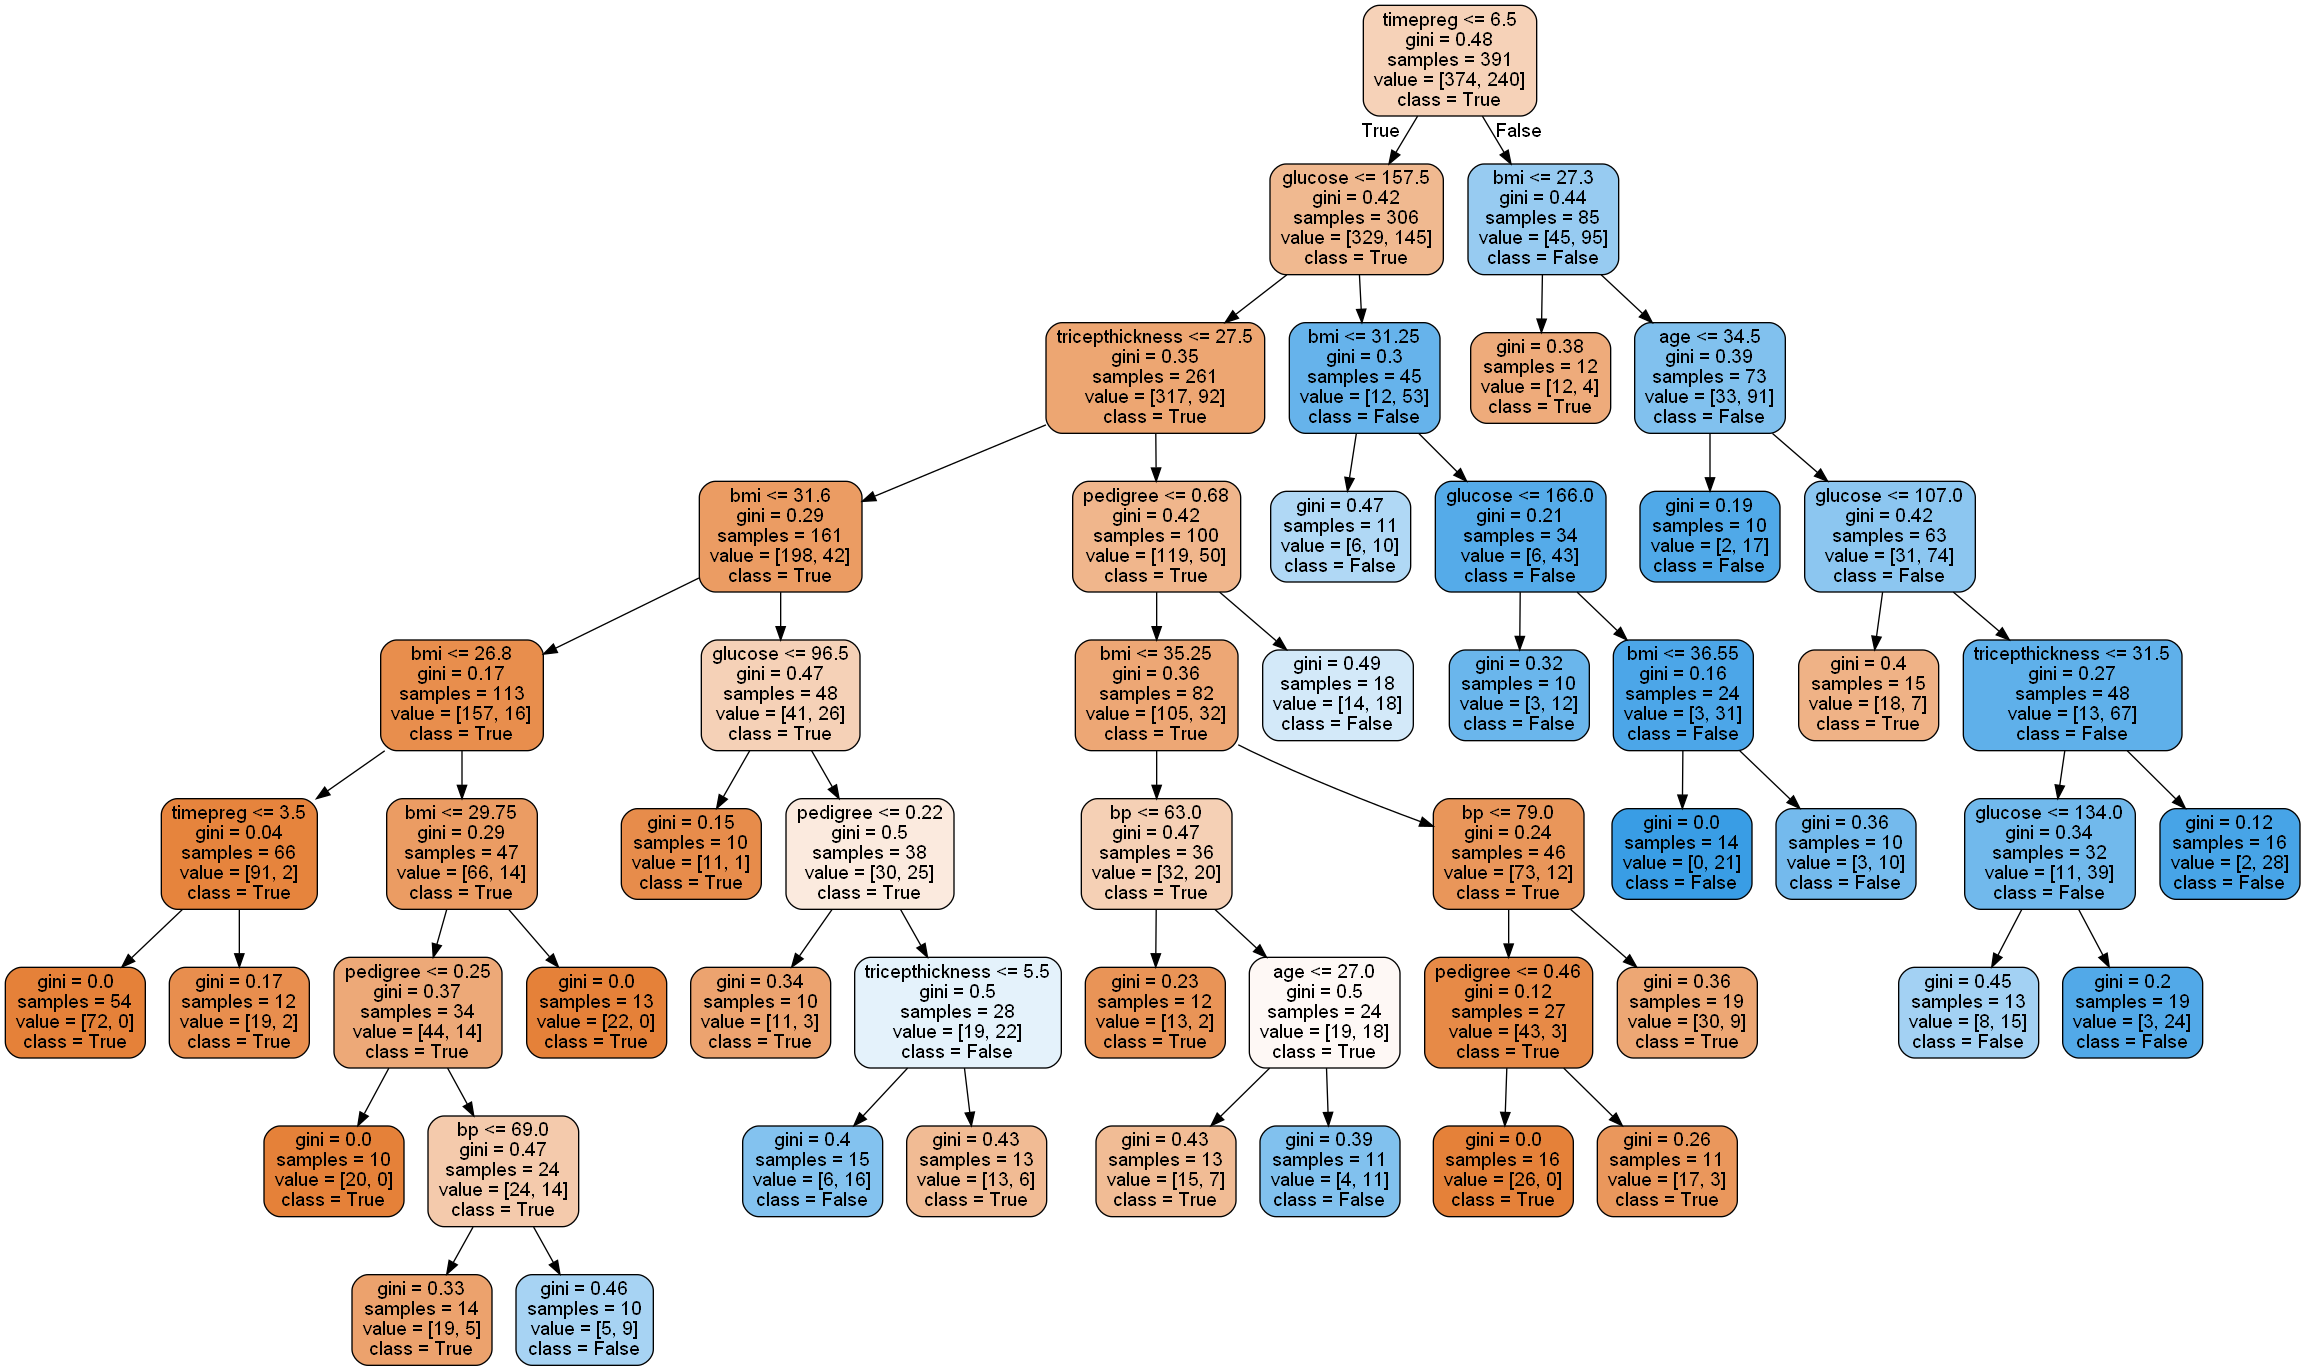

In [34]:
##### Visualize the decision tree in graphic format
estimator = random_forest_model.estimators_[25]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tre.dot', 
                feature_names = ["timepreg","glucose","bp","tricepthickness","insulin","bmi","pedigree","age"],
                class_names = ["True", "False"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import check_call
check_call(['dot', '-Tpng', 'tre.dot', '-o', 'tre.png', '-Gdpi = 600'])
Image(filename = 'tre.png')